In [1]:
!pip install numpy
!pip install matplotlib
!pip install seaborn
!pip install scipy
!pip install scikit-learn


[notice] A new release of pip is available: 23.2.1 -> 23.3.1
[notice] To update, run: pip install --upgrade pip

[notice] A new release of pip is available: 23.2.1 -> 23.3.1
[notice] To update, run: pip install --upgrade pip

[notice] A new release of pip is available: 23.2.1 -> 23.3.1
[notice] To update, run: pip install --upgrade pip

[notice] A new release of pip is available: 23.2.1 -> 23.3.1
[notice] To update, run: pip install --upgrade pip

[notice] A new release of pip is available: 23.2.1 -> 23.3.1
[notice] To update, run: pip install --upgrade pip


In [2]:
from sklearn.datasets import make_blobs
# randomの種が「0」で、特徴量は2つ、塊数は2つ、ばらつき1の、300個のデータを作成
X, y = make_blobs(n_samples=300,  # サンプル数
                n_features=2, # 特徴量の数
                centers=2, # クラスタの数
                cluster_std=1.0, # クラスタ内のばらつき
                random_state=0) # 乱数生成器の状態を指定

In [3]:
import pandas as pd

# 特徴量(X)でデータフレームを作り、分類(y)をtarget列として追加
df = pd.DataFrame(X)
df['target'] = y
df.head()

,0,1,target
0,3.359415,5.248267,0
1,2.931100,0.782556,1
2,1.120314,5.758061,0
3,2.876853,0.902956,1
4,1.666088,5.605634,0


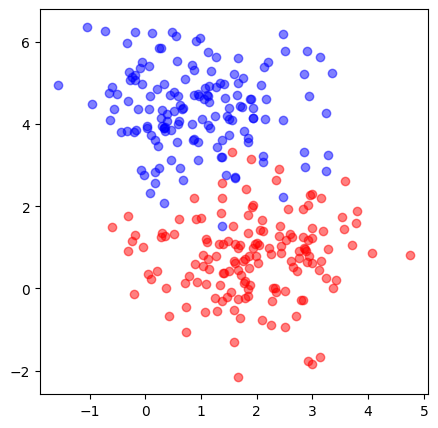

In [5]:
import matplotlib.pyplot as plt
%matplotlib inline

# 分類によって、別々のデータフレームに分ける
df0 = df[df['target']==0]
df1 = df[df['target']==1]

# 分類0は青、分類1は赤で、散布図を描く
plt.figure(figsize=(5,5))
plt.scatter(df0[0], df0[1], color='b", alpha=0.5)
plt.scatter(df1[0], df1[1], color='r", alpha=0.5)

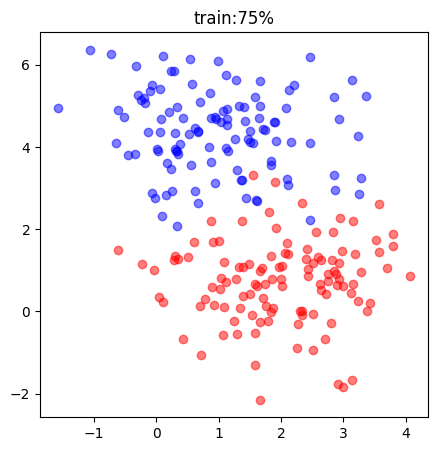

NameError: name 'df_test' is not defined

In [8]:
# データを学習用とテスト用に分ける
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, # 特徴量
                                                    y, # 分類
                                                    random_state=0) # 乱数生成器の状態を指定

# 学習用の特徴量(X_train)でデータフレームを作り、と分類(y_train)をtargetの例として追加
df = pd.DataFrame(X_train) # 学習用のデータフレームを作成
df["target"] = y_train # 分類をtarget列として追加
# 分類によって、別々のデータフレームに分ける
df0 = df[df['target']==0] # 分類0のデータフレーム
df1 = df[df['target']==1] 
plt.figure(figsize=(5,5)) # サイズを指定
# 分類0は青、分類1は赤で、散布図を描く
plt.scatter(df0[0], df0[1], color="b", alpha=0.5) # 分類0の散布図
plt.scatter(df1[0], df1[1], color="r", alpha=0.5) # 分類1の散布図
plt.title("train:75%") # タイトルを表示
plt.show() # グラフを表示

# テスト用の特徴量(X_test)でデータフレームを作り、と分類(y_test)をtargetの例として追加
df = pd.DataFrame(X_test) # テスト用のデータフレームを作成
df["target"] = y_test # 分類をtarget列として追加
# 分類によって、別々のデータフレームに分ける
df0 = df_test[df_test['target']==0] # 分類0のデータフレーム
df1 = df_test[df_test['target']==1]
plt.figure(figsize=(5,5)) # サイズを指定
# 分類0は青、分類1は赤で、散布図を描く
plt.scatter(df0[0], df0[1], color="b", alpha=0.5) # 分類0の散布図
plt.scatter(df1[0], df1[1], color="r", alpha=0.5) # 分類1の散布図
plt.title("test:25%") # タイトルを表示
plt.show() # グラフを表示



In [9]:
from sklearn import svm
#サポートベクターマシンで学習モデルを作成
model = svm.SVC()
#学習モデルに学習用データを与えて学習させる
model.fit(X_train, y_train)

SVC()

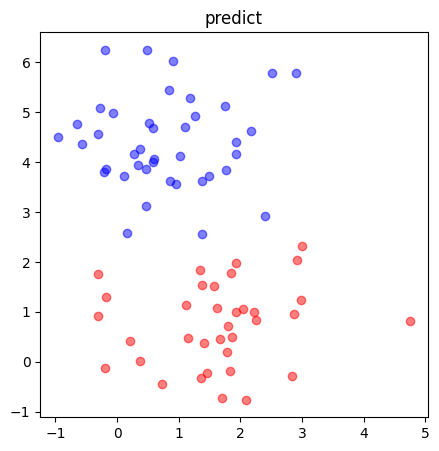

In [10]:
# テスト用データのすべてで予測を行う
pred = model.predict(X_test)
# テスト用の特徴量(X_test)でデータフレームを作り、予測結果(pred)をtarget列として追加
df = pd.DataFrame(X_test) # テスト用のデータフレームを作成
df["target"] = pred # 予測結果をtarget列として追加
# 分類によって、別々のデータフレームに分ける
df0 = df[df['target']==0] # 分類0のデータフレーム
df1 = df[df['target']==1]
plt.figure(figsize=(5,5)) # サイズを指定
# 分類0は青、分類1は赤で、散布図を描く
plt.scatter(df0[0], df0[1], color="b", alpha=0.5) # 分類0の散布図
plt.scatter(df1[0], df1[1], color="r", alpha=0.5) # 分類1の散布図
plt.title("predict") # タイトルを表示
plt.show() # グラフを表示

In [15]:
from sklearn.metrics import accuracy_score
# 正解率を表示
pred = model.predict(X_test)
score = accuracy_score(y_test, pred)
print("正解率:" ,score*100, "%")

正解率: 96.0 %
